In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Data/character-predictions.csv')

In [4]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling.csv')
df.rename(columns={'DateoFdeath': 'dateOfDeath'}, inplace=True)

In [5]:
pd.set_option('display.max_rows', None)

d = df['title'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

                                                 Value  Number of observations
0                                                  Ser                     272
1                                              Maester                      30
2                                           Winterfell                      15
3                                          Archmaester                      14
4                                             Princess                      14
5                                                 Lord                      12
6                                               Septon                      10
7                                        Grand Maester                       8
8                                                 Lady                       8
9                  Lord Commander of the Night's Watch                       7
10                                           Cupbearer                       7
11                                              Prin

In [6]:
df['title'] = df['title'].fillna('no title')

df['category'] = df['title'].apply(lambda x: 'lord' if 'lord' in x.lower() else ('lady' if 'lady' in x.lower() else ''))

filtered_df = df[df['category'].isin(['lord', 'lady'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

  Value  Number of observations
0  lord                      61
1  lady                      16


In [7]:
df['title'] = df['title'].fillna('no title')

df['category'] = df['title'].apply(lambda x: 'prince' if 'prince' in x.lower() else ('prince' if 'princess' in x.lower() else ''))

filtered_df = df[df['category'].isin(['prince', 'princess'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

    Value  Number of observations
0  prince                      32


In [8]:
df['category'] = df['title'].apply(lambda x: 'master' if 'master' in x.lower() else '')

filtered_df = df[df['category'].isin(['master'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

    Value  Number of observations
0  master                       9


In [9]:
df['title'] = df['title'].fillna('no title')
df['title'] = df['title'].apply(lambda x: 'Lord' if 'lord' in x.lower() else ('Lady' if 'lady' in x.lower() else x))
df['title'] = df['title'].apply(lambda x: 'Prince' if 'prince' in x.lower() else x)
df['title'] = df['title'].apply(lambda x: 'Master' if 'master' in x.lower() else x)

In [10]:
pd.set_option('display.max_rows', None)

d = df['title'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

                               Value  Number of observations
0                           no title                     703
1                                Ser                     272
2                               Lord                      61
3                             Prince                      32
4                            Maester                      30
5                               Lady                      16
6                         Winterfell                      15
7                        Archmaester                      14
8                             Septon                      10
9                             Master                       9
10                     Grand Maester                       8
11                         Cupbearer                       7
12                            Knight                       4
13                             Septa                       4
14                             Eyrie                       4
15                     C

In [11]:
df.drop(columns=['father', 'mother', 'spouse', 'heir', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

In [12]:
only_birth_count = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].isnull()].shape[0]
only_death_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].notnull() & df['age'].isnull()].shape[0]
only_age_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].isnull() & df['age'].notnull()].shape[0]
all_missing_count = df[df[['dateOfBirth', 'dateOfDeath', 'age']].isnull().all(axis=1)].shape[0]
death_age_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].notnull() & df['age'].notnull()].shape[0]
death_birth_count = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].notnull() & df['age'].isnull()].shape[0]
alive = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].notnull() & df['isAlive'] == 1].shape[0]


print("Number of characters with only date of birth:", only_birth_count)
print("Number of characters with only date of death:", only_death_count)
print("Number of characters with only age:", only_age_count)
print("Number of characters with age and date of death", death_age_count)
print("Number of characters with date of birth and date of death", death_birth_count)
print("Number of characters with all three values missing:", all_missing_count)
print("Number of characters still alive that don't have date of death:", alive)


Number of characters with only date of birth: 0
Number of characters with only date of death: 218
Number of characters with only age: 0
Number of characters with age and date of death 0
Number of characters with date of birth and date of death 0
Number of characters with all three values missing: 829
Number of characters still alive that don't have date of death: 205


In [13]:
df.loc[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].notnull() & (df['isAlive'] == 1), 'dateOfDeath'] = 500

In [14]:
# Count negative values in dateOfBirth column
negative_dateOfBirth = (df['dateOfBirth'] < 0).sum()

# Count negative values in dateOfDeath column
negative_dateOfDeath = (df['dateOfDeath'] < 0).sum()

# Count negative values in age column
negative_age = (df['age'] < 0).sum()

print("Number of negative values in dateOfBirth:", negative_dateOfBirth)
print("Number of negative values in dateOfDeath:", negative_dateOfDeath)
print("Number of negative values in age:", negative_age)


Number of negative values in dateOfBirth: 2
Number of negative values in dateOfDeath: 0
Number of negative values in age: 0


In [15]:
print(df[df['dateOfBirth'] < 0])

                   name               title  male   culture  dateOfBirth  \
739   Visenya Targaryen  QueenDowager Queen     0  Valyrian        -28.0   
1347  Rhaenys Targaryen               Queen     0  Valyrian        -25.0   

      dateOfDeath            house  book1  book2  book3  book4  book5  \
739          44.0  House Targaryen      1      1      1      1      1   
1347         10.0  House Targaryen      1      0      0      0      0   

      isMarried  isNoble   age  numDeadRelations  boolDeadRelations  \
739           1        1  72.0                 5                  1   
1347          1        1  35.0                 1                  1   

      isPopular  popularity  isAlive category  
739           0    0.277592        0           
1347          0    0.277592        0           


In [16]:
birth_min = df['dateOfBirth'].min()
birth_max = df['dateOfBirth'].max()

age_min = 0
age_max = 100

def generate_age():
    age = int(np.random.normal(25, 15))
    return max(age_min, min(age, age_max))

def fill_missing_values(row):
    if pd.isnull(row['age']):
        if row['isAlive'] == 0:
            # If dateOfDeath is provided
            if pd.notnull(row['dateOfDeath']):
                # Generate random age
                row['age'] = generate_age()
                # Calculate birth year
                row['dateOfBirth'] = row['dateOfDeath'] - row['age']
            else:
                # Generate random birth year and age
                row['dateOfBirth'] = np.random.randint(0, 100)
                row['age'] = generate_age()
                # Calculate death year
                row['dateOfDeath'] = row['dateOfBirth'] + row['age']
        else:
            # Generate random age for alive individuals
            row['age'] = generate_age()
            # Calculate birth year
            row['dateOfBirth'] = birth_max - row['age']
            row['dateOfDeath'] = 500  # Ensure dateOfDeath remains 3000 for alive characters
    return row

# Apply the function to the DataFrame
df = df.apply(fill_missing_values, axis=1)


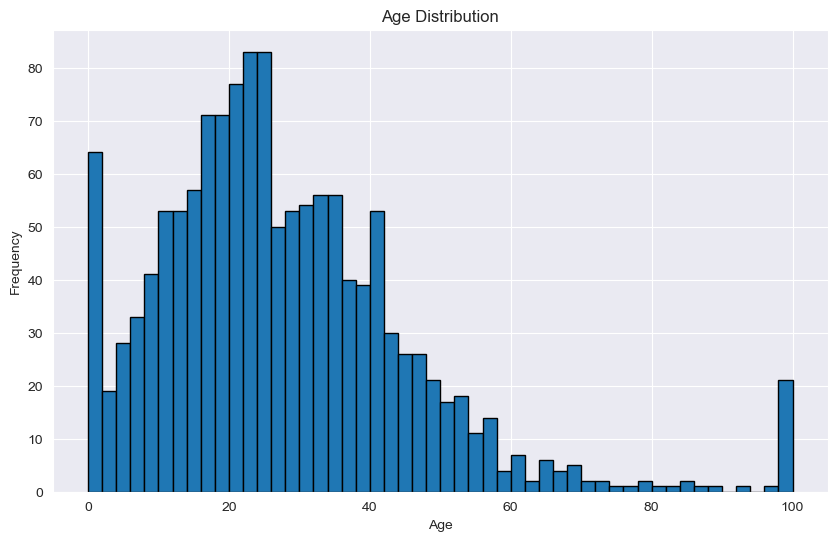

In [17]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=50, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
d = df['culture'].value_counts().reset_index()

d.columns = ['Value', 'Number of observations']

print(d)

                      Value  Number of observations
0                  Northmen                      90
1                  Ironborn                      78
2                 Free Folk                      35
3                  Valyrian                      32
4                  Braavosi                      25
5                  Ghiscari                      18
6                   Dornish                      16
7                     Reach                      15
8                   Valemen                      12
9                  Rivermen                      12
10                 Dothraki                      10
11               Dornishmen                      10
12                 Westeros                       9
13                Free folk                       8
14                Westerman                       8
15                 northmen                       7
16               Stormlands                       6
17      Vale mountain clans                       5
18          

In [19]:
unification_dict = {
    'Northmen': ['Northmen', 'northmen', 'Northern mountain clans'],
    'Ironborn': ['Ironborn', 'Ironmen', 'ironborn'],
    'Free Folk': ['Free Folk', 'Free folk', 'free folk', 'Wildling', 'Wildlings'],
    'Westermen': ['Westerman', 'Westermen', 'westermen', 'Westeros', 'Westerlands'],
    'Dornish': ['Dornish', 'Dornishmen', 'Dorne'],
    'Valemen': ['Valemen', 'Vale', 'Vale mountain clans'],
    'Summer Isles': ['Summer Isles', 'Summer Islands'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Astapori': ['Astapori', 'Astapor'],
    'Meereenese': ['Meereen', 'Meereenese'],
    'Ghiscari': ['Ghiscaricari', 'Ghiscari'],
    'Tyroshi': ['Tyroshi'],
    'Norvoshi': ['Norvos', 'Norvoshi'],
    'Rhoynar': ['Rhoynar'],
    'Qartheen': ['Qartheen', 'Qarth']
}

# Reverse the dictionary to map individual terms to unified terms
unification_map = {term: unified for unified, terms in unification_dict.items() for term in terms}

# Function to unify group names
def unify_group_names(group):
    return unification_map.get(group, group)

# Apply the function to the DataFrame
df['culture'] = df['culture'].apply(unify_group_names)

# Group by the unified group names and sum the counts
df_unified = df['culture'].value_counts().reset_index()

print(df_unified)

         culture  count
0       Northmen    101
1       Ironborn     84
2      Free Folk     48
3       Valyrian     32
4        Dornish     27
5       Braavosi     25
6      Westermen     23
7       Ghiscari     19
8        Valemen     18
9          Reach     15
10      Rivermen     12
11      Dothraki     10
12  Summer Isles      6
13    Stormlands      6
14        Lysene      6
15      Qartheen      5
16       Tyroshi      3
17    Meereenese      3
18    Crannogmen      3
19     First Men      3
20      Astapori      3
21     Sistermen      2
22    Riverlands      2
23      Norvoshi      2
24     Lhazareen      2
25        Asshai      1
26      Pentoshi      1
27         Andal      1
28     The Reach      1
29   Stormlander      1
30       Rhoynar      1


In [20]:
df['culture'] = df['culture'].fillna('unknown')

In [21]:
df['hasTitle'] = df['title'].apply(lambda x: 0 if x == 'no title' else 1)

In [22]:
df = pd.get_dummies(df, columns=['culture'], prefix='culture')

In [23]:
d = df['title'].value_counts().reset_index()

print(d)

                               title  count
0                           no title    703
1                                Ser    272
2                               Lord     61
3                             Prince     32
4                            Maester     30
5                               Lady     16
6                         Winterfell     15
7                        Archmaester     14
8                             Septon     10
9                             Master      9
10                     Grand Maester      8
11                         Cupbearer      7
12                            Knight      4
13                             Septa      4
14                             Eyrie      4
15                     Casterly Rock      4
16                 King in the North      4
17                  Hand of the King      4
18                          Coldmoat      3
19                              Khal      3
20              King-Beyond-the-Wall      3
21                      Bitterbr

In [24]:
hierarchy = {
    'no title': 'Other',
    'Ser': 'Knight',
    'Lord': 'Noble',
    'Prince': 'Royalty',
    'Maester': 'Scholar',
    'Lady': 'Noble',
    'Winterfell': 'Location',
    'Archmaester': 'Scholar',
    'Septon': 'Religious',
    'Master': 'Official',
    'Grand Maester': 'Scholar',
    'Cupbearer': 'Servant',
    'Knight': 'Knight',
    'Septa': 'Religious',
    'Eyrie': 'Location',
    'Casterly Rock': 'Location',
    'King in the North': 'Royalty',
    'Hand of the King': 'Official',
    'Coldmoat': 'Location',
    'Khal': 'Tribal Leader',
    'King-Beyond-the-Wall': 'Royalty',
    'Bitterbridge': 'Location',
    'Bloodrider': 'Warrior',
    'Last Hearth': 'Location',
    'Wisdom': 'Official',
    'Brightwater': 'Location',
    'Hightower': 'Location',
    'Captain of the guard': 'Official',
    'Sunspear': 'Location',
    'Acorn Hall': 'Location',
    'Blackcrown': 'Location',
    'Harrenhal': 'Location',
    'Queen': 'Royalty',
    'Khalakka': 'Tribal Leader',
    'Stonehelm': 'Location',
    'Castellan': 'Official',
    'Starpike': 'Location',
    'Goodwife': 'Other',
    'Cerwyn': 'Location',
    'King': 'Royalty',
    'Ashford': 'Location',
    'Barrowton': 'Location',
    'First Ranger': 'Warrior',
    'Karhold': 'Location',
    'Hornwood': 'Location',
    'Golden Tooth': 'Location',
    'QueenBlack Bride': 'Royalty',
    'Blacktyde': 'Location',
    'Old Wyk': 'Location',
    'Deepwood Motte': 'Location',
    'Seagard': 'Location',
    'Dreadfort': 'Location',
    'Commander of the City Watch': 'Official',
    'Greenstone': 'Location',
    'Crakehall': 'Location',
    'Blue Grace': 'Religious',
    'Redfort': 'Location',
    'Golden Storm': 'Other',
    'Seneschal': 'Official',
    'Duskendale': 'Location',
    'Sweetport Sound': 'Location',
    'Storm\'s End': 'Location',
    'Longsister': 'Location',
    'Green Grace': 'Religious',
    'First Builder': 'Other',
    'Rills': 'Location',
    'Twins': 'Location',
    'QueenDowager Queen': 'Royalty',
    'Strongsong': 'Location',
    'Runestone': 'Location',
    'Magnar of Thenn': 'Tribal Leader',
    'King of Winter': 'Royalty',
    'Castle Lychester': 'Location',
    'Serthe Knight of Saltpans': 'Knight',
    'Raventree Hall': 'Location',
    'Grassy Vale': 'Location',
    'Godswife': 'Religious',
    'Widow\'s Watch': 'Location',
    'Hayford': 'Location',
    'Castellan of Harrenhal': 'Official',
    'Fair Isle': 'Location',
    'Mistress of whisperers': 'Official',
    'Wyndhall': 'Location',
    'Shatterstone': 'Location',
    'Three Towers': 'Location',
    'Sweetsister': 'Location',
    'Harlaw': 'Location',
    'Old Oak': 'Location',
    'Andals': 'Other',
    'Stone Hedge': 'Location',
    'Riverrun': 'Location',
    'Stokeworth': 'Location',
    'Sandstone': 'Location',
    'Wind Witch': 'Location',
    'Ten Towers': 'Location',
    'Three Sisters': 'Location',
    'Ruddy Hall': 'Location',
    'Goodman': 'Other',
    'BrotherProctor': 'Other',
    'green lands': 'Other',
    'Slave of R\'hllor': 'Other',
    'Red Flower Vale': 'Location',
    'Chief Undergaoler': 'Other',
    'Light of the West': 'Other',
    'Black Wind': 'Other',
    'Lonely Light': 'Location',
    'Highgarden': 'Location',
    'Coldwater Burn': 'Location',
    'SerCastellan of Casterly Rock': 'Knight',
    'Kayce': 'Location',
    'Eastwatch-by-the-Sea': 'Location',
    'High Steward of Highgarden': 'Official',
    'Keeper of the Gates of the Moon': 'Official',
    'Feastfires': 'Location',
    'Haystack Hall': 'Location',
    'Arbor': 'Location',
    'Rook\'s Rest': 'Location',
    'Nightsong': 'Location',
    'Commander of the Second Sons': 'Official',
    'Steward': 'Official',
    'Knight of Griffin\'s Roost': 'Knight',
    'Oakenshield': 'Location',
    'CastellanCommander': 'Official',
    'Captain': 'Official',
    'Horn Hill': 'Location',
    'Volmark': 'Location',
    'Blackmont': 'Location',
    'Magister': 'Other',
    'Maidenpool': 'Location',
    'King of Astapor': 'Royalty',
    'Dyre Den': 'Location',
    'Undergaoler': 'Other',
    'Pinkmaiden': 'Location',
    'Broad Arch': 'Location',
    'Greenshield': 'Location',
    'Ghost Hill': 'Location',
    'Seven Kingdoms': 'Other',
    'Warlock': 'Other',
    'Big BucketThe Wull': 'Other',
    'Iron Islands': 'Location',
    'Dragonstone': 'Location',
    'Protector of the Realm': 'Official',
    'Wraith': 'Other',
    'Tradesman-Captain': 'Other'
}

df['hierarchy'] = df['title'].map(hierarchy)

In [25]:
d = df['hierarchy'].value_counts().reset_index()

print(d)

        hierarchy  count
0           Other    722
1          Knight    279
2        Location    119
3           Noble     77
4         Scholar     52
5         Royalty     47
6        Official     31
7       Religious     17
8         Servant      7
9   Tribal Leader      6
10        Warrior      5


In [26]:
one_hot = pd.get_dummies(df['hierarchy'])

df = pd.concat([df, one_hot], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1362 non-null   object 
 1   title                 1362 non-null   object 
 2   male                  1362 non-null   int64  
 3   dateOfBirth           1362 non-null   float64
 4   dateOfDeath           1341 non-null   float64
 5   house                 1063 non-null   object 
 6   book1                 1362 non-null   int64  
 7   book2                 1362 non-null   int64  
 8   book3                 1362 non-null   int64  
 9   book4                 1362 non-null   int64  
 10  book5                 1362 non-null   int64  
 11  isMarried             1362 non-null   int64  
 12  isNoble               1362 non-null   int64  
 13  age                   1362 non-null   float64
 14  numDeadRelations      1362 non-null   int64  
 15  boolDeadRelations    

In [28]:
df['house'] = df['house'].fillna('unknown')
df['hasHouse'] = df['house'].apply(lambda x: 0 if x == 'unknown' else 1)

d = df['house'].value_counts().reset_index()
print(d)

                                    house  count
0                                 unknown    299
1                           Night's Watch     74
2                              House Frey     69
3                             House Stark     54
4                         House Targaryen     44
5                         House Lannister     40
6                           House Greyjoy     30
7                            House Tyrell     25
8                           House Martell     21
9                             House Arryn     15
10                           House Osgrey     14
11                           House Bolton     11
12                          House Bracken     11
13                        House Baratheon     11
14                        House Crakehall     10
15                           House Botley     10
16                        House Hightower     10
17                     Faith of the Seven      9
18                          House Florent      9
19                  

In [29]:
house_counts = df['house'].value_counts()

df['house_encoded'] = df['house'].map(house_counts)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1362 non-null   object 
 1   title                 1362 non-null   object 
 2   male                  1362 non-null   int64  
 3   dateOfBirth           1362 non-null   float64
 4   dateOfDeath           1341 non-null   float64
 5   house                 1362 non-null   object 
 6   book1                 1362 non-null   int64  
 7   book2                 1362 non-null   int64  
 8   book3                 1362 non-null   int64  
 9   book4                 1362 non-null   int64  
 10  book5                 1362 non-null   int64  
 11  isMarried             1362 non-null   int64  
 12  isNoble               1362 non-null   int64  
 13  age                   1362 non-null   float64
 14  numDeadRelations      1362 non-null   int64  
 15  boolDeadRelations    

In [31]:
df.drop(columns = ['name', 'title', 'house', 'category', 'hierarchy'])
df.to_csv('../Data/Modeling/character-predictions-modeling-encoded.csv', index=False)